In [16]:
import numpy as np
import numba
from matplotlib import pyplot as plt
from numba import jit

In [6]:
print(numba.__version__)

0.38.0


In [7]:
@jit(nopython = True)
def go_fast(a):
    
    trace = 0
    
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
        
    return a + trace

In [8]:
x = np.arange(100).reshape(10,10)

go_fast(x)

array([[  9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.],
       [ 19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.],
       [ 29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.],
       [ 39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.],
       [ 49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.],
       [ 59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.],
       [ 69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.],
       [ 79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.],
       [ 89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.],
       [ 99., 100., 101., 102., 103., 104., 105., 106., 107., 108.]])

In [9]:
go_fast(2*x)

array([[  9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,  25.,  27.],
       [ 29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.],
       [ 49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,  67.],
       [ 69.,  71.,  73.,  75.,  77.,  79.,  81.,  83.,  85.,  87.],
       [ 89.,  91.,  93.,  95.,  97.,  99., 101., 103., 105., 107.],
       [109., 111., 113., 115., 117., 119., 121., 123., 125., 127.],
       [129., 131., 133., 135., 137., 139., 141., 143., 145., 147.],
       [149., 151., 153., 155., 157., 159., 161., 163., 165., 167.],
       [169., 171., 173., 175., 177., 179., 181., 183., 185., 187.],
       [189., 191., 193., 195., 197., 199., 201., 203., 205., 207.]])

In [10]:
%timeit go_fast(x)

1.64 µs ± 34.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
np.testing.assert_array_equal(go_fast(x), go_fast.py_func(x))

In [12]:
%timeit go_fast.py_func(x)

37.1 µs ± 2.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
import random

@jit(nopython=True)
def spherical_to_cartesian(r, theta, phi):
    '''Convert spherical coordinates (physics convention) to cartesian coordinates'''
    sin_theta = np.sin(theta)
    x = r * sin_theta * np.cos(phi)
    y = r * sin_theta * np.sin(phi)
    z = r * np.cos(theta)
    
    return x, y, z # return a tuple
    
@jit(nopython=True)
def random_directions(n, r):
    '''Return ``n`` 3-vectors in random directions with radius ``r``'''
    out = np.empty(shape=(n,3), dtype=np.float64)
    
    for i in range(n):
        # Pick directions randomly in solid angle
        phi = random.uniform(0, 2*np.pi)
        theta = np.arccos(random.uniform(-1, 1))
        # unpack a tuple
        x, y, z = spherical_to_cartesian(r, theta, phi)
        out[i] = x, y, z
    
    return out

In [14]:
random_directions(10, 1.0)

array([[-0.45646097,  0.31558045, -0.83189685],
       [-0.51938293, -0.82579025, -0.21979951],
       [ 0.59506384,  0.71657125, -0.363902  ],
       [ 0.45085245, -0.12978731,  0.88311229],
       [-0.48975631, -0.84892496,  0.19865842],
       [ 0.67237945,  0.731864  , -0.11081946],
       [ 0.04732621, -0.7826863 ,  0.62061452],
       [ 0.21488063, -0.15012552,  0.96503298],
       [ 0.00860422, -0.66969621, -0.74258532],
       [ 0.17444916, -0.14692065,  0.97364358]])

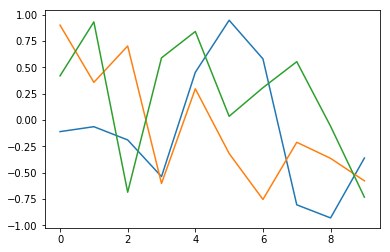

In [17]:
plt.plot(random_directions(10, 1.0))
plt.show()